# '''
    date: 2018/8/1
    author: Ole211
    detail:
        1.爬取好奇心日报网站数据
        2.对好奇心日报网站数据进行分析
        3.数据可视化
'''

In [9]:
import sqlite3
import matplotlib
import matplotlib.pyplot as plt

# 数据已经爬取到本地数据库

读取数据库数据

In [142]:
conn = sqlite3.connect("/sdcard/1/csv/qdaily.db")

In [143]:
url_id = conn.execute("select id from qdaily order by id;").fetchall()
comment = conn.execute("select comments_num from qdaily order by id;").fetchall()
sharenum = conn.execute("select sharenum from qdaily order by id;").fetchall()
date = conn.execute("select date from qdaily order by id;").fetchall()
title = conn.execute("select title from qdaily order by id;").fetchall()

暂时爬取了15302数据

In [144]:
comment[:5]
len(comment)

15302

In [145]:
sharenum[:5]

[(49,), (76,), (308,), (25,), (87,)]

# 文字属性设置(可显示中文)

In [146]:
font_path = '/sdcard/1/font/方正标宋.ttf'

font = matplotlib.font_manager.FontProperties(fname=font_path,size=15)

#plt.rcParams['axes.unicode_minus'] = True

#plt.rcParams['font.sans-serif'] = myfont

plt.rcdefaults()

# id与评论数关系图

In [ ]:

plt.plot(url_id, comment, 'r')
plt.title("id 与评论数关系图",fontproperties=font, fontsize=25)
plt.xlabel("id", fontsize=15)
plt.ylabel("comments", fontsize=15)
plt.xlim(35000, 56000)
plt.show()

# id与分享数关系图

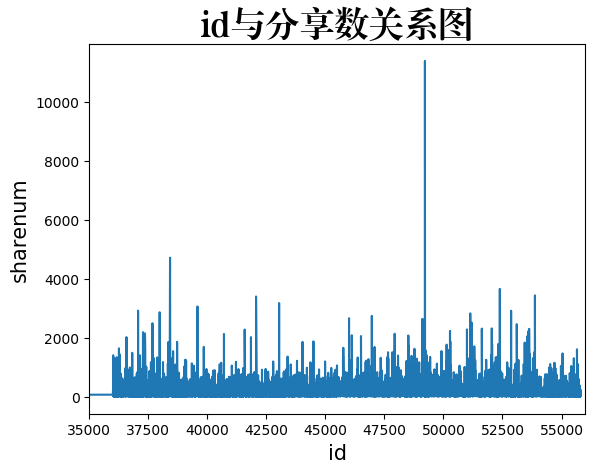

In [148]:

plt.plot(url_id, sharenum)
plt.title('id与分享数关系图', fontproperties=font, fontsize=25)
plt.xlabel('id', fontsize=15)
plt.ylabel('sharenum', fontsize=15)
plt.xlim(35000, 56000)
plt.show()


# 转换为DataFrame格式

In [149]:
data = []
for i in range(len(url_id)):
    dic = {}
    dic['title'] = title[i][0]
    dic['url_id'] = url_id[i][0]
    dic['sharenum'] = sharenum[i][0]
    dic['comment'] = comment[i][0]
    data.append(dic)
    

In [150]:
import pandas as pd

# 保存为csv

In [151]:
df = pd.DataFrame(data)
df.to_csv("/sdcard/1/csv/qdaily.csv")

In [152]:

df.T.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15292,15293,15294,15295,15296,15297,15298,15299,15300,15301
comment,4,1,28,5,8,45,3,3,3,25,...,14,13,7,13,11,1,20,71,75,17
sharenum,49,76,308,25,87,1412,147,27,29,398,...,21,23,36,31,21,16,44,251,93,43


In [153]:
type(df.url_id[0])

numpy.int64

In [164]:
#按评论数排序
d1 = df_order_by_comment = df.sort_values(by=["comment"], ascending=False)
#按分享数排序
d2 = df_order_by_sharenum = df.sort_values(by=["sharenum"], ascending=False)

# 评论数前10名

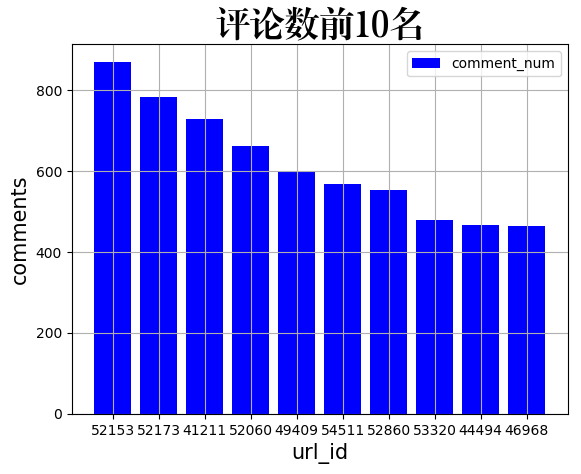

,12548,12564,4280,12467,10639,14252,13012,13360,6949,8802
url_id,52153,52173,41211,52060,49409,54511,52860,53320,44494,46968
comment,871,784,730,662,601,569,553,479,467,465
title,一夜之间增加的#我是同性恋话题，停在了 2.4 亿阅读量上,济南，一场 300 多人参与的同性恋亲友恳谈会上发生了什么？,台湾的同志最晚两年后可合法结婚，婚姻平权有了新进展,快手的算法，和这个社会的高雅低俗,二胎带来的刺激只持续了一年，去年中国人口出生比上一年少63万 | 好奇心小数据,非洲爸爸，中国妈妈，“我算是哪里人？”｜“低端全球化”④,香港特首回应了普通话和粤语之争，人们依然看法不一,“517 国际不再恐同日”这天，很多人都做了一些力所能及的事情,10 月 1 日起，网上发帖、跟帖、发弹幕全都得实名认证,好奇心日报招人，这里有 15 个要求和 6 个问题


In [215]:
labels= [str(i) for i in d1.url_id[:10]]
plt.bar(range(10), d1.comment[:10], color="b", label="comment_num")
plt.title("评论数前10名", fontproperties=font,fontsize=25)
plt.xlabel("url_id", fontsize=15)
plt.ylabel("comments", fontsize=15)
plt.xticks(range(10), labels)
plt.grid()
plt.legend()
plt.show()

d1.iloc[:10, [3, 0, 2]].T

In [196]:
[i for i in d1.url_id[:10] ]

[52153, 52173, 41211, 52060, 49409, 54511, 52860, 53320, 44494, 46968]

# 分享数前10名

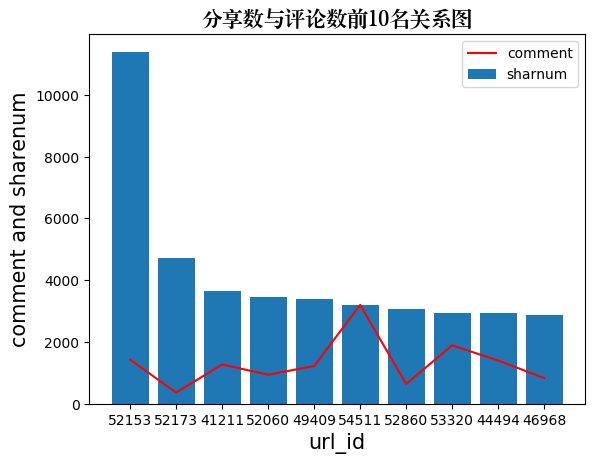

,10498,1958,12752,13795,4964,5764,2913,805,13016,1603
url_id,49216,38425,52387,53874,42066,43043,39585,37071,52865,37985
sharenum,11401,4724,3666,3445,3408,3185,3070,2927,2924,2873
title,这个高科技 专治顽固性低头症,求职季，刷网站投简历以外，我们还帮你想了这 9 个办法 | Hack Your Life,互联网公司大数据杀熟越来越厉害，这里有 7 个办法避开它 | Hack Your Life,BBC发布了一份100本经典书单，它们都改变了这个世界,人人心中都有一个最佳电影榜单，这是《纽约时报》眼中的本世纪 Top 25,关于自由，你值得看这 20 本书，并为之纪念,借助软件养成新习惯不容易，我们试了上百应用只有这 8 个坚持超过半年 | Hack Your...,这个社会，对年轻人太好了吗？①,马克思 200 岁，他和他的主义的 63 个面孔,乐观和悲观交替而来，我们可以做点什么 | 这个社会，对年轻人太好了吗？（完）


In [219]:
plt.bar(range(10), d2.sharenum[:10],label="sharnum")
plt.plot(range(10), d2.comment[:10]*10, color="r", label="comment")
plt.xticks(range(10), labels)
plt.title("分享数与评论数前10名关系图", fontproperties=font,
         )
plt.xlabel("url_id", fontsize=15)
plt.ylabel("comment and sharenum", fontsize=15)
plt.legend()
plt.show()

d2.iloc[:10, [3, 1, 2]].T